## Ensemble Version Explanation
This ensemble is composed of 2 CNN models:
1. The first model uses RGB images (no transformations)
2. The second model uses grayscale local histogram normalized images

The 2 models use the same architecture: **CNN_C** (found in the file `vpc_cnn_c.py`). They only differ in the input data and input channels.

In [5]:
from importlib import reload

import vpc_ensemble_model_5a_gray
import vpc_data

reload(vpc_ensemble_model_5a_gray)
reload(vpc_data)

<module 'vpc_data' from 'c:\\Universidade\\vpc\\VPC-TP\\src\\ensemble_5a_gray\\vpc_data.py'>

In [7]:
ensemble = vpc_ensemble_model_5a_gray.EnsembleModel5AGray("5AGray", img_size=30)

Model: "MemberModelA0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30, 30, 1)]       0         
_________________________________________________________________
resizing_5 (Resizing)        (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)      

In [8]:
ensemble.train_ensemble(epochs=120, stop_early=True)

Loading Training data from 43 directories
Training images loaded. Shuffling data.
X_train_gray.shape (31367, 30, 30, 1)
X_valid_gray.shape (7842, 30, 30, 1)
y_train.shape (31367,)
y_valid.shape (7842,)


c:\Users\badns\anaconda3\envs\deeplearning_v2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/120
980/980 [==============================] - 123s 115ms/step - loss: 0.9635 - accuracy: 0.7781 - val_loss: 0.3612 - val_accuracy: 0.9056

Epoch 00001: val_loss improved from inf to 0.36122, saving model to saved_models\5AGray
INFO:tensorflow:Assets written to: saved_models\5AGray\assets
Epoch 2/120
980/980 [==============================] - 113s 115ms/step - loss: 0.2663 - accuracy: 0.9352 - val_loss: 0.2917 - val_accuracy: 0.9235

Epoch 00002: val_loss improved from 0.36122 to 0.29175, saving model to saved_models\5AGray
INFO:tensorflow:Assets written to: saved_models\5AGray\assets
Epoch 3/120
980/980 [==============================] - 112s 114ms/step - loss: 0.1940 - accuracy: 0.9516 - val_loss: 0.3357 - val_accuracy: 0.9061

Epoch 00003: val_loss did not improve from 0.29175
Epoch 4/120
980/980 [==============================] - 110s 112ms/step - loss: 0.1736 - accuracy: 0.9570 - val_loss: 0.1170 - val_accuracy: 0.9674

Epoch 00004: val_loss improved from 0.29175 to 0.1169

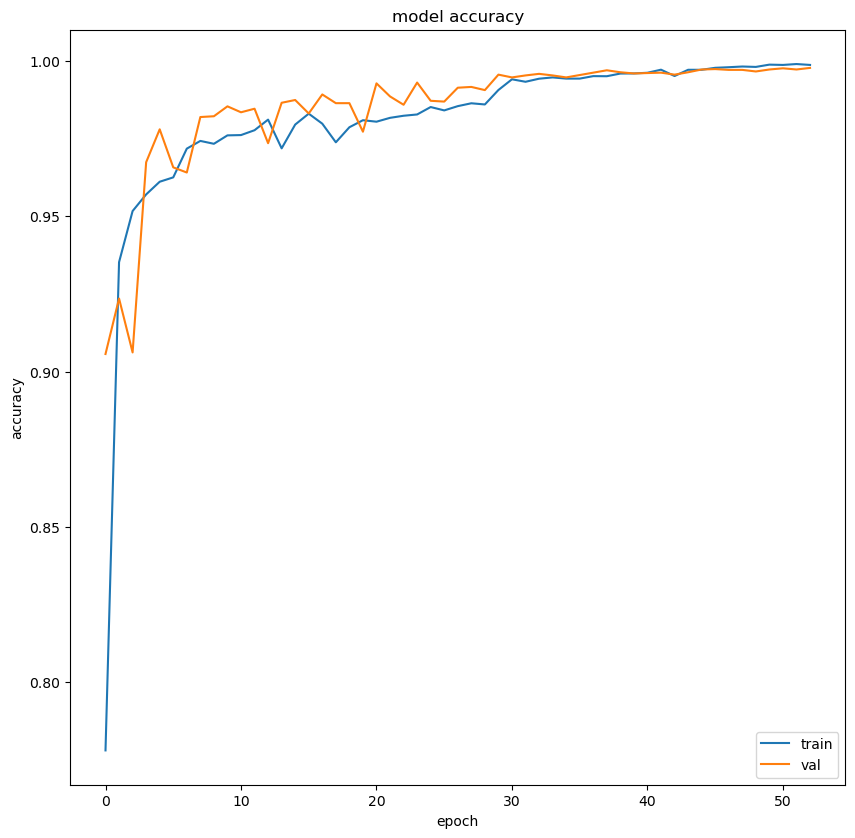

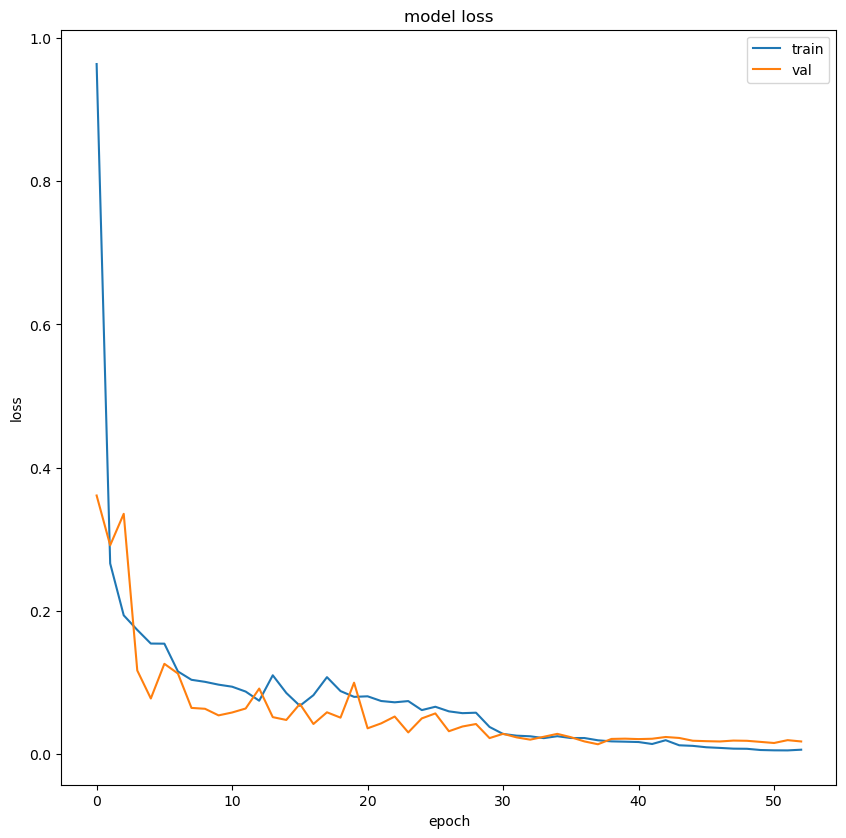

In [9]:
ensemble.plot_history()

In [10]:
X_test_gray, y_test = vpc_data.load_testing_data()

Loading testing data from 43 directories
Test images loaded.
test_gray data shape:  (12630, 30, 30, 1)
test_labels shape:  (12630,)


Predictions:  [ 0  0  0 ... 42 42 42]
(12630,)
Test Data accuracy:  97.76722090261283
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.99      0.99      0.99       720
           2       0.99      1.00      1.00       750
           3       1.00      0.97      0.98       450
           4       0.99      0.99      0.99       660
           5       0.95      0.99      0.97       630
           6       0.99      0.83      0.90       150
           7       0.97      0.98      0.97       450
           8       0.99      0.96      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.97      0.95      0.96       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      0.99      1.00       270
          15       0.93      0.98      0.95      

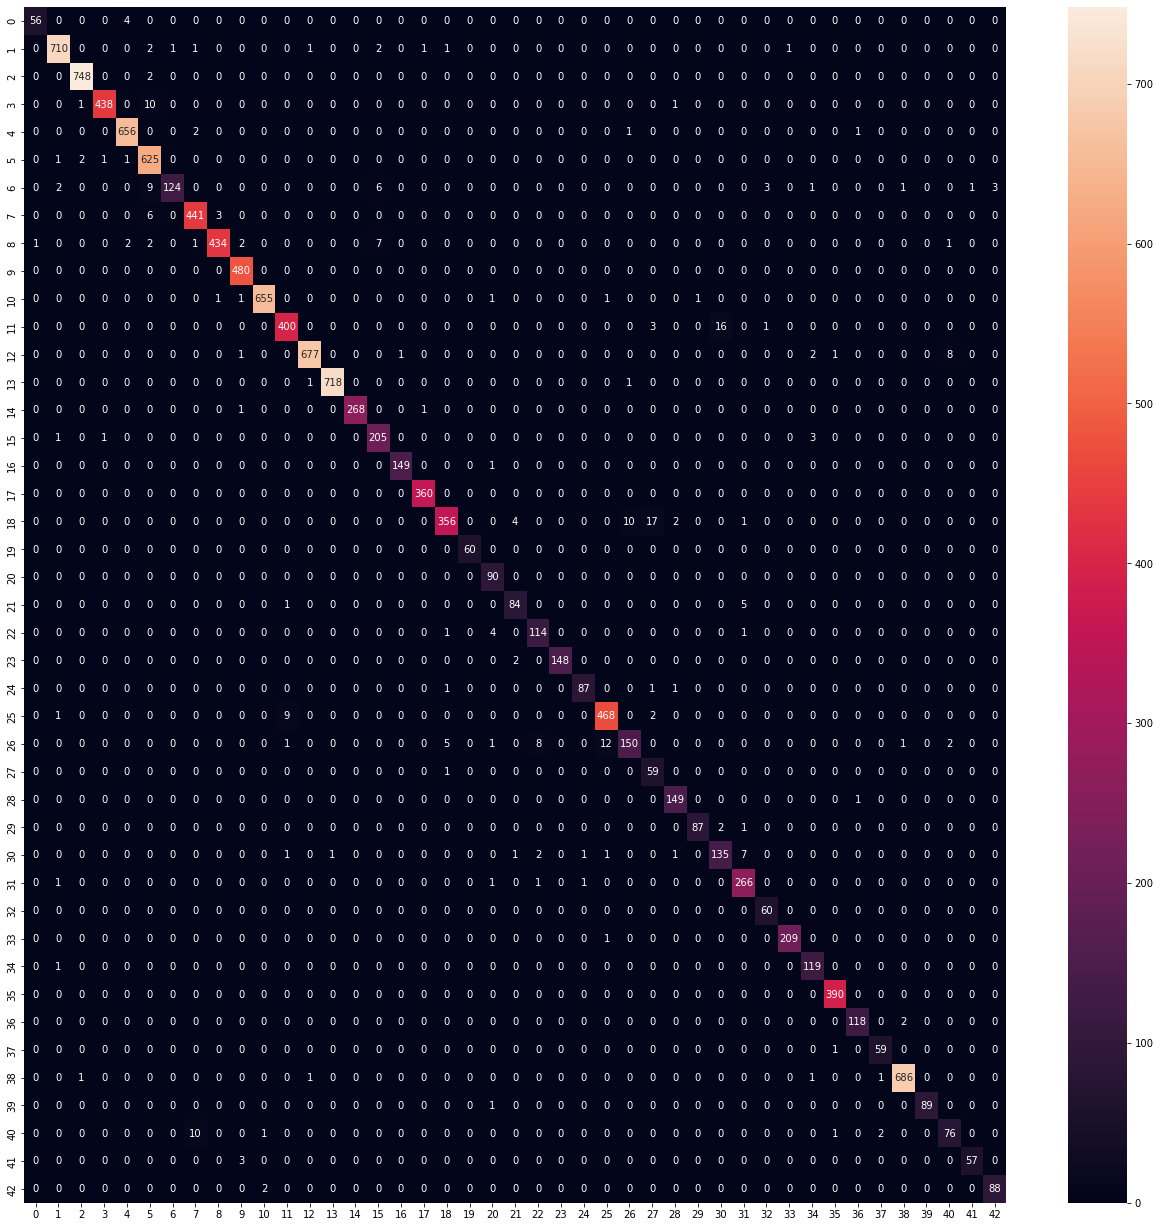

In [11]:
ensemble.evaluate_ensemble(X_test_gray, y_test)

In [12]:
loaded_ensemble_5a_gray = vpc_ensemble_model_5a_gray.EnsembleModel5AGray("5AGray", img_size=30)
loaded_ensemble_5a_gray.load_full_model()
loaded_ensemble_5a_gray.evaluate_error(X_test_gray, y_test)

Model: "MemberModelA0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 30, 30, 1)]       0         
_________________________________________________________________
resizing_10 (Resizing)       (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_72 (Batc (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_73 (Batc (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 64)      